# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
traning_set = pd.read_csv("Google_Stock_Price_Train.csv")
traning_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
traning = traning_set.iloc[:, 1:2].values

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_traning_data = scaler.fit_transform(traning)

In [8]:
scaled_traning_data.shape

(1258, 1)

In [9]:
X_train = []
y_train = []

# Creating a Data Structure with 60 timesteps and 1 output
for i in range(60, 1258):
    X_train.append(scaled_traning_data[i-60 : i, 0])
    y_train.append(scaled_traning_data[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
# Reshaping if we have to put another key feature in between like if Google Stock Price is dependent on Some Another variable
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building the Model

In [51]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [52]:
regressor = Sequential()

In [53]:
# Adding First LSTM Layer

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [54]:
# Adding Second LSTM Layer

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [55]:
# Adding third LSTM Layer

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [56]:
# Adding fourth and Last LSTM Layer

regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(0.2))

In [57]:
regressor.add(Dense(units=1))

In [58]:
regressor.compile(optimizer="adam", loss="mean_squared_error")

In [59]:
regressor.fit(X_train, y_train, epochs=200, batch_size=32)

Epoch 1/200
38/38 [==============================] - 7s 49ms/step - loss: 0.0388
Epoch 2/200
38/38 [==============================] - 2s 52ms/step - loss: 0.0065
Epoch 3/200
38/38 [==============================] - 2s 55ms/step - loss: 0.0054
Epoch 4/200
38/38 [==============================] - 2s 58ms/step - loss: 0.0048
Epoch 5/200
38/38 [==============================] - 2s 60ms/step - loss: 0.0045
Epoch 6/200
38/38 [==============================] - 2s 57ms/step - loss: 0.0049
Epoch 7/200
38/38 [==============================] - 2s 48ms/step - loss: 0.0046
Epoch 8/200
38/38 [==============================] - 2s 48ms/step - loss: 0.0057
Epoch 9/200
38/38 [==============================] - 2s 48ms/step - loss: 0.0044
Epoch 10/200
38/38 [==============================] - 2s 48ms/step - loss: 0.0038
Epoch 11/200
38/38 [==============================] - 2s 50ms/step - loss: 0.0046
Epoch 12/200
38/38 [==============================] - 2s 48ms/step - loss: 0.0037
Epoch 13/200
38/38 [=====

38/38 [==============================] - 2s 49ms/step - loss: 0.0017
Epoch 102/200
38/38 [==============================] - 2s 49ms/step - loss: 0.0015
Epoch 103/200
38/38 [==============================] - 2s 47ms/step - loss: 0.0014
Epoch 104/200
38/38 [==============================] - 2s 48ms/step - loss: 0.0015
Epoch 105/200
38/38 [==============================] - 2s 48ms/step - loss: 0.0014
Epoch 106/200
38/38 [==============================] - 2s 49ms/step - loss: 0.0014
Epoch 107/200
38/38 [==============================] - 2s 47ms/step - loss: 0.0013
Epoch 108/200
38/38 [==============================] - 2s 49ms/step - loss: 0.0013
Epoch 109/200
38/38 [==============================] - 2s 47ms/step - loss: 0.0014
Epoch 110/200
38/38 [==============================] - 2s 48ms/step - loss: 0.0014
Epoch 111/200
38/38 [==============================] - 2s 48ms/step - loss: 0.0013
Epoch 112/200
38/38 [==============================] - 2s 48ms/step - loss: 0.0011
Epoch 113/200
38/3

38/38 [==============================] - 2s 48ms/step - loss: 0.0011
Epoch 200/200
38/38 [==============================] - 2s 49ms/step - loss: 0.0011


# Making the Pridictions

In [60]:
test_set= pd.read_csv("Google_Stock_Price_Test.csv")
test_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [61]:
test = test_set.iloc[:, 1:2].values

In [62]:
test

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [65]:
train_test_data = pd.concat(objs=(traning_set["Open"], test_set["Open"]), axis=0)

In [66]:
train_test_data

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [67]:
inputs = train_test_data[len(train_test_data)- len(test_set)-60 : ].values

In [68]:
inputs = inputs.reshape(-1, 1)

In [69]:
inputs = scaler.transform(inputs)

In [70]:
X_test = []

# Creating a Data Structure with 60 timesteps and 1 output
for i in range(60, 80):
    X_test.append(inputs[i-60 : i, 0])
    
X_test = np.array(X_test)


In [71]:
X_test =  np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [72]:
pred_stock_price = regressor.predict(X_test)

In [73]:
pred_stock_price = scaler.inverse_transform(pred_stock_price)

# Visualizaing The Predicted Values

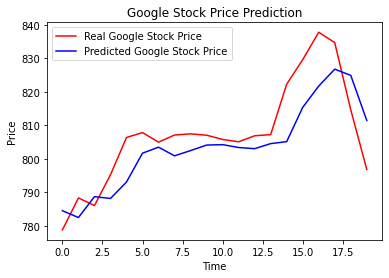

In [74]:
plt.plot(test, color="red", label="Real Google Stock Price")
plt.plot(pred_stock_price, color="blue", label="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()